In [2]:
import pandas as pd
import numpy as np

from tkinter import filedialog as fd
from tkinter import Tk, BOTH

from datetime import datetime
from datetime import timedelta

from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import bootstrap
from sympy import *

import seaborn as sns
import matplotlib.pyplot as plt


pd.options.display.float_format = '{:,.3f}'.format

import warnings
warnings.filterwarnings("ignore")

from typing import Tuple

%matplotlib inline


## Задача 1

По данным 7 измерений некоторой величины найдены средняя результатов измерений, равная 30 и выборочная дисперсия, равная 36. Найдите границы, в которых с надежностью 0,99 заключено истинное значение измеряемой величины.

In [2]:
n = 7
df = n - 1
mean = 30
var = 36
q = 0.99

sample_var = n/df * var  

sample_scale = np.sqrt(sample_var/n)

t.interval(q, df, loc=mean, scale=sample_scale)

(20.918693089657708, 39.08130691034229)

## Задача 2

Доверительный интервал для дисперсии

In [3]:
n = 12
df = n - 1
sample_var = 10
q = 0.9

h2 = chi2.ppf((1-q)/2, df)
h1 = chi2.ppf((1+q)/2, df)

ci_low = (df * sample_var) / h1
ci_high = (df * sample_var) / h2

ci = ci_low, ci_high

ci

(5.590812241777006, 24.04469824071958)

## Задача 3 

С целью размещения рекламы опрошено 420 телезрителей, из которых данную передачу смотрят 170 человек. С доверительной вероятностью γ=0,91 найти долю телезрителей, охваченных рекламой в лучшем случае.

In [4]:
n = 420
m = 170
p = m/n
q = 0.91

z1 = norm.ppf((1-q)/2)
z2 = norm.ppf((1+q)/2)
              
ci_low = p - z2 * np.sqrt(p*(1-p)/n)
ci_high = p + z2 * np.sqrt(p*(1-p)/n)

ci = ci_low, ci_high

ci

(0.3641557260455601, 0.4453680834782494)

In [5]:
scale = np.sqrt(0.405 * (1-0.405) / 420)
norm.interval(0.91, loc=0.405, scale=scale)

(0.36439000448223735, 0.44560999551776276)

## Задача 4

По группе семей с доходом $154 руб./чел$. зафиксированы следующие цифры потребления молока за месяц (на одного человека): 8,3; 8,6; 8,7; 8,8; 9,1; 9,3; 9,4; 13,4; 13,5; 13,8; 13,9; 14,1; 14,3. Найти доверительный интервал для математического ожидания и дисперсии с надежностью $γ = 0,95$ , дать точность оценки. Выборка произведена из нормальной совокупности. 

In [11]:
milk_consumption = [8.3, 8.6, 8.7, 8.8, 9.1, 9.3, 9.4, 13.4, 13.5, 13.8, 13.9, 14.1, 14.3]

#### доверительный интервал для математического ожидания

In [12]:
n = len(milk_consumption)
df = n - 1
mean = np.mean(milk_consumption)
sample_var = np.var(milk_consumption, ddof=1)
q = 0.95

sample_scale = np.sqrt(sample_var/n)

t.interval(q, df, loc=mean, scale=sample_scale)

(9.602841354518604, 12.735620183942936)

#### доверительный интервал для математического ожидания Бутсрапом

In [13]:
rng = np.random.default_rng()
data = (milk_consumption,)
ci = bootstrap(data, np.mean, confidence_level=0.95, n_resamples=1000,
                   random_state=rng).confidence_interval

ci

ConfidenceInterval(low=9.7544113704867, high=12.407692307692312)

In [14]:
var = []

for i in range(1000):
    arr = np.random.choice(milk_consumption, len(milk_consumption))
    var.append(np.mean(arr))
    
q = 95

ci_low = np.percentile(var, (100-q)/2)
ci_high = np.percentile(var, (100+q)/2)

ci = ci_low, ci_high

ci

(9.814615384615383, 12.484615384615383)

#### доверительный интервал для дисперсии

In [15]:
n = len(milk_consumption)
df = n - 1
mean = np.mean(milk_consumption)
var = np.var(milk_consumption, ddof=1)
q = 0.95


h2 = chi2.ppf((1-q)/2, df)
h1 = chi2.ppf((1+q)/2, df)

ci_low = (df * var) / h1
ci_high = (df * var) / h2

ci = ci_low, ci_high

ci

(3.4549793303608407, 18.308711278905957)

In [18]:
n = len(milk_consumption)
df = n - 1
mean = np.mean(milk_consumption)
var = np.var(milk_consumption, ddof=1)
sample_scale = df*var
q = 0.95

h2, h1 = chi2.interval(0.95, 12)

ci_low = (df * var) / h1
ci_high = (df * var) / h2

ci = ci_low, ci_high

ci

(3.4549793303608407, 18.308711278905957)

#### доверительный интервал для дисперсии Бутстрапом

In [19]:
var = []

for i in range(1000):
    arr = np.random.choice(milk_consumption, len(milk_consumption))
    var.append(np.var(arr))
    
q = 95

ci_low = np.percentile(var, (100-q)/2)
ci_high = np.percentile(var, (100+q)/2)

ci = ci_low, ci_high

ci

(3.562121301775147, 6.950630177514794)

In [20]:
rng = np.random.default_rng()
data = (milk_consumption,)
ci = bootstrap(data, np.var, confidence_level=0.95, n_resamples=1000,
                   random_state=rng).confidence_interval

ci

ConfidenceInterval(low=5.256087555113354, high=7.449894489186123)

#### находим точность оценки

In [210]:
n = len(milk_consumption)
df = n - 1
var = np.var(milk_consumption, ddof=1)
std = np.sqrt(var)
t_value = t.ppf(0.975, df)

acc_of_assessment = t_value * std / np.sqrt(n)

acc_of_assessment 

1.5663894147121658

## Задача 5

Построить доверительный интервал для математического ожидания $a$ нормально распределенной генеральной совокупности с известным среднеквадратичным отклонением $σ=6$ с помощью выборки объема $n=36$ с данным средним выборочным $75.17$, с заданной надежностью $0.90$.

In [47]:
n = 36
df = n - 1
std = 6
var = std**2
sample_var = n/df*var
mean = 75.17
q=0.9

sample_scale = np.sqrt(sample_var/n)

t.interval(q, df, loc=mean, scale=sample_scale)

(73.4564607822325, 76.8835392177675)

## Задача 6

Центром экономических исследований при органах регионального управления проведено выборочное наблюдение с целью изучения расходов населения на коммунальные услуги. В результате двухпроцентного обследования получены следующие данные:

| Расходы населения на коммунальные услуги, на человека, руб. | До 600 | 600-800 | 800-1000 | 1000-1200 | 1200 и более | Итого|
| --- | --- | --- | --- | --- | --- | --- |
| Численность обследованного населения, тыс. чел. | 3.3 | 5.4 | 7.6 | 3.2 | 0.5 | 20.0 |


Определите:

1. с вероятностью $0,997$ доверительный интервал средней величины расходов населения на коммунальные услуги по всему населению региона;
2. с вероятностью $0,954$ долю населения региона, у которых расходы на коммунальные услуги находятся в пределах $600-1000$ руб.;
3. численность выборки, чтобы ее ошибку уменьшить в $2$ раза.

#### с вероятностью  $0,997$  доверительный интервал средней величины расходов населения на коммунальные услуги по всему населению региона;

In [27]:
df = pd.DataFrame({'x_i':[500, 700, 900, 1100, 1300], 'n_i':[3300, 5400, 7600, 3200, 500]})

df['w_i'] = df['n_i'] / df['n_i'].sum()

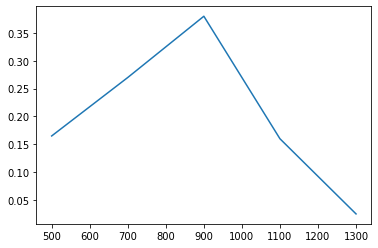

In [28]:
xk = df['x_i']
pk = df['w_i']
custm_dist = stats.rv_discrete(name='cust_dist', values=(xk, pk))

fig, ax = plt.subplots(1, 1)
ax.plot(xk, custm_dist.pmf(xk))

plt.show()

In [29]:
mean = round(custm_dist.mean(), 0)
var = round(custm_dist.var(), 0)

n = round(df['n_i'].sum(), 0)
ddof = n - 1
sample_var = n/ddof*var
q=0.997

sample_scale = np.sqrt(sample_var/n)

t.interval(q, ddof, loc=mean, scale=sample_scale)

(817.723559782915, 826.2764402170849)

#### с вероятностью  $0,954$  долю населения региона, у которых расходы на коммунальные услуги находятся в пределах  600−1000  руб.;

In [31]:
p = (5400 + 7600) / 20000 
scale = np.sqrt((p * (1-p)) / n)

norm.interval(0.954, loc=p, scale=scale)

(0.6432701681292743, 0.6567298318707258)

In [43]:
p - norm.ppf((1+0.954)/2)*np.sqrt((p*(1-p)/n))

0.6432701681292743